# Dynamical systems
*Martino Sorbaro*

*This notebook was partly inspired to last year's work by Laura Driscoll, with contributions from Bing Wen Brunton, Alice Schwarze, Matt Golub through NeuroAcademy.*

### Objectives of this lesson

By the end of this lesson, you will be able to
- Think about physical and biological systems in terms of states and dynamics
- Understand what a differential equation is and how to describe its behaviour
- Solve simple differential equations numerically using Python code
- Consider cases where the state of the system is represented by more than one variable

## States and dynamics
The theory of dynamical systems is a branch of physics that has interesting applications in many fields of engineering and, in general, in modelling natural phenomena.
In this tutorial, we will be learning about behavior of dynamical systems -- systems that evolve in time -- where the rules by which they evolve in time are described precisely by a differential equation.

The concept of state is one of the most interesting points introduced in modern physics. I want to encourage you to think, intuitively, in terms of state. We all have an internal state: we can be hungry, happy, tired; we have an internal temperature, levels of glucose in blood, and many other variables describe us. All together, they make our "state". Based on our state, we function better or worse, or act in different ways. The "hungry" state changes our behaviour: we are more likely to go towards the kitchen, for example.

At a lower level, our brain has different states: different areas may be more active at different times, depending on whether I'm focusing on visual information, or on language, or on fine motor control. The brain's global state may be noticeably and macroscopically different in particular cases, such as sleep or an epileptic seizure.

Lower down in the hierarchy of scales in our brain, individual networks in our brain also have states: that can be more active or less active, or oscillate (e.g. brain waves). But they also have states in the sense that they may contain information on a single memory, or not contain it. It may be able to associate neurons in a way that can perform a motor function, a logical function, a sensory function, or it may never have learned to do it.

For a single neuron, a state can be represented by its membrane potential, by how recently it has spiked, by how strongly connected it is to other neurons, by the concentrations of sodium, potassium, and calcium, etc.

All these states **evolve in time** based on **interactions** with the external world. The evolution of a state is called **dynamics**.

In systems neuroscience, we can think of two layers of dynamics: the network dynamics, which deals with the changes in membrane potentials, spikes, firing rates; and the learning dynamics, which deals which changes in synaptic weights.


## Single-variable differential equations
Now, let's get into the math a bit. Consider the following equation:

$$ \tau \frac{dV(t)}{dt} = -V(t) + I(t) $$

*Where have we seen this equation before, and what does it model?*

*What is the* unknown *in this equation?*

This is a **differential equation**. It tells us how a certain physical quantity $V$ (the membrane potential) evolves in time $t$ given a certain input current $I$. Its unknown is not a number, but a function.

In general, Ordinary Differential Equations (ODEs) of the first order are of the form
$$ \frac{dy}{dt} = F(y) $$

A common notational short-hand is to write $\dot{y}$ for $\frac{dy}{dt}$. The dot means "the derivative with respect to time". As a reminder, the derivative represents how much that quantity grows or decreases in time.

Differential equations can sometimes be solved **analytically**, i.e. by explicitly finding a function that satisfies the equation. However, often it is impossible to find one. This doesn't mean that the solution doesn't exist: just that it doesn't have a simple form that we can write down as a formula.

In these cases, we use our computers to "numerically integrate" the equation.

The simplest method for numerically solving ODEs (Ordinary Differential Equations) has existed at least since Leonhard Euler used it in the 18th century, and so it is called the **forward Euler** method.

### Example: the logistic equation
Consider the following equation:

$$ \frac{dy(t)}{dt} = ky(t)\cdot (M - y(t)) $$

This equation is interesting even in biology, because it models the growth of a population (of humans, animals, bacteria) in the presence of finite resources (and therefore, with a maximum population over which the environment is unable to support life).

Even if it can be solved analytically, we can use it as an example for the forward Euler method. The key point about it is **discretizing time** in small intervals $dt$. Let us rewrite it as 

$$ \frac{y(t+dt) - y(t)}{dt} = ky(t)\cdot (M - y(t)) $$
and therefore
$$ y(t+dt) = y(t) + dt \cdot ky(t)\cdot (M - y(t)) $$

In this form, we can see that, given the state of the population $y$ at time $t$, we can always predict what happens at time $t+dt$. This is why it's called *forward* Euler.

Let's code it up!

In [26]:
# Define a few constants
M = 100   # the parameter that gives the max supported population
k = 0.01  # the parameter that gives the speed of growth
dt = 0.1 # we just choose a small number
Tmax = 10 # max time
y0 = 2.0  # the initial population

In [27]:
import numpy as np

# time goes from 0 to Tmax with increments of dt
times = np.arange(0, Tmax, dt)
# just a placeholder
y = np.empty_like(times)
y[0] = y0

for i in range(len(times) - 1):
    # the actual equation
    y[i+1] = y[i] + dt * k * y[i] * (M - y[i])

Text(0, 0.5, 'Population')

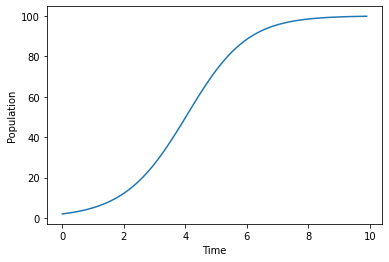

In [29]:
import matplotlib.pyplot as plt

plt.plot(times, y)
plt.xlabel("Time")
plt.ylabel("Population")

### Reflect: understanding the solution

Try playing with the code and interpreting the equation and its solutions:
- What do the parameters $k$ and $M$ represent?
- What happens as we change the initial population? What if we set it larger than $M$?
- What happens if `dt` is too large?
- How does all this fit with our interpretation of the equation?

### Optional: reimplementing the LIF neuron

The first equation in this page was that of the charging membrane potential of a LIF neuron. Try implementing that in the same way as we did for the logistic equation. In addition, to make it fire, we will have to implement a threshold mechanism: when $y$ goes above a certain value, it shall be reset to 0 and a spike is recorded.


## Equilibrium: fixed points

Consider a pendulum swinging from a metal rod. This system has exactly two equilibrium points: a **stable equilibrium** (mass at the bottom), and an **unstable equilibrium** (mass at the top, unsure which side to fall to).

Equilibria can help us understand the global behavior of a system: how does it behave in the long run? Does it converge to a single value? Does it oscillate?

Equilibrium points are points where the derivative is **zero** -- and indeed, our system does not move or evolve. We also call them fixed points. In the equation above, we can therefore find the fixed points by imposing $$ ky(t)(M-y(t)) = 0 $$

### Reflect: understanding equilibria
- Which fixed points does the equation have?
- In what parts of the graph is the derivative positive/negative?
- Can we deduce which fixed points are stable and which unstable?
- What does this teach us about the system?